In [18]:
import pandas as pd
import math
import random
# from matplotlib.cm import binary
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
# from sklearn.datasets import fetch_openml
# from sklearn.ensemble  import RandomForestClassifier,RandomForestRegressor
# from sklearn.svm import SVC
# from sklearn import svm
# from sklearn.neural_network import MLPClassifier
# from sklearn.linear_model import SGDClassifier, LogisticRegression,LinearRegression
# from sklearn.metrics import confusion_matrix,classification_report,precision_score,recall_score,f1_score,precision_recall_curve
# from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, KFold, cross_val_score, StratifiedShuffleSplit,cross_val_predict
# from sklearn.metrics import accuracy_score,mean_squared_error
# from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.naive_bayes import GaussianNB
# from sklearn.tree import DecisionTreeClassifier
from pandas.plotting import scatter_matrix
from statsmodels.graphics.mosaicplot import mosaic
# from sklearn.pipeline import Pipeline
# from sklearn.impute import SimpleImputer
# from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
%matplotlib inline

In [5]:
df = pd.read_csv('movies.csv',names=['Film','Genre','Lead Studio','Audience score %','Profitability','Rotten Tomatoes %','Worldwide Gross','Year'])
df

,Film,Genre,Lead Studio,Audience score %,Profitability,Rotten Tomatoes %,Worldwide Gross,Year
0,Zack and Miri Make a Porno,Romance,The Weinstein Company,70,1.747542,64,$41.95,2008
1,Youth in Revolt,Comedy,The Weinstein Company,52,1.090000,68,$19.62,2010
2,You Will Meet a Tall Dark Stranger,Comedy,Independent,35,1.211818,43,$26.66,2010
3,When in Rome,Comedy,Disney,44,0.000000,15,$43.04,2010
4,What Happens in Vegas,Comedy,Fox,72,6.267647,28,$219.37,2008
...,...,...,...,...,...,...,...,...
72,Across the Universe,romance,Independent,84,0.652603,54,$29.37,2007
73,A Serious Man,Drama,Universal,64,4.382857,89,$30.68,2009
74,A Dangerous Method,Drama,Independent,89,0.448645,79,$8.97,2011
75,27 Dresses,Comedy,Fox,71,5.343622,40,$160.31,2008


In [6]:
df.shape

(77, 8)

In [15]:
df['Profitability'].max()

66.934

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Film               77 non-null     object 
 1   Genre              77 non-null     object 
 2   Lead Studio        77 non-null     object 
 3   Audience score %   77 non-null     int64  
 4   Profitability      77 non-null     float64
 5   Rotten Tomatoes %  77 non-null     int64  
 6   Worldwide Gross    77 non-null     object 
 7   Year               77 non-null     int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 4.9+ KB


In [8]:
df.isnull().sum()

Film                 0
Genre                0
Lead Studio          0
Audience score %     0
Profitability        0
Rotten Tomatoes %    0
Worldwide Gross      0
Year                 0
dtype: int64

Text(0, 0.5, 'Profitability')

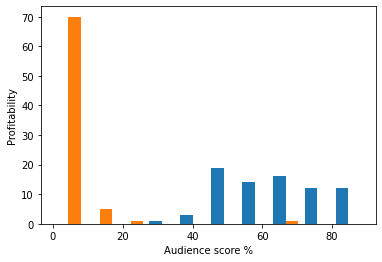

In [16]:
plt.hist(df[['Audience score %','Profitability']])
plt.xlabel("Audience score %")
plt.ylabel("Profitability")

In [20]:
newDf = df.drop(['Film','Genre','Lead Studio','Year'],axis=1)

In [22]:
for i in range(len(newDf['Worldwide Gross'])):
    newDf['Worldwide Gross'][i] = newDf['Worldwide Gross'][i][1:]   

C:\Users\DELL\AppData\Local\Temp\ipykernel_24552\1058308444.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newDf['Worldwide Gross'][i] = newDf['Worldwide Gross'][i][1:]


In [30]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(newDf)

KMeans(n_clusters=5)

In [31]:
newDf['cluster'] = kmeans.labels_

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


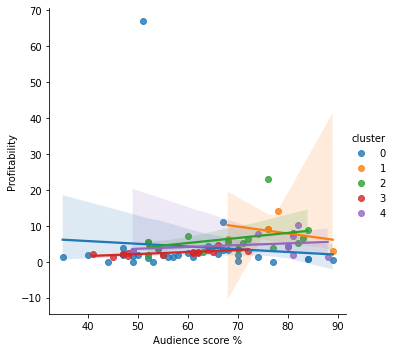

In [32]:
sns.lmplot('Audience score %','Profitability',data = newDf,hue='cluster')

<AxesSubplot:xlabel='cluster', ylabel='count'>

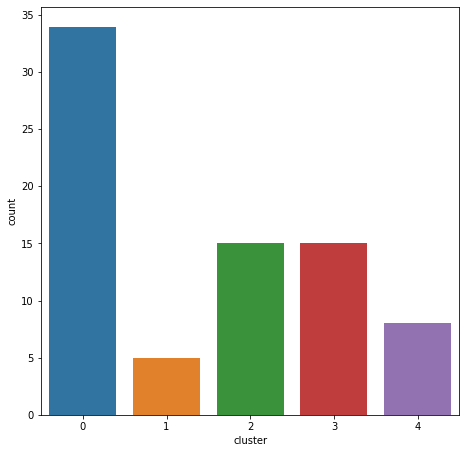

In [37]:
plt.rcParams['figure.figsize'] = (7.5,7.5)
sns.countplot(x='cluster',data=newDf)